In [1]:
import numpy as np
from ase import Atoms
import pyiron_workflow as pwf
from pyiron_workflow import Workflow

from pyiron_workflow_atomistics.calculator import extract_values, calculate_structure_node
import os
from ase.build import bulk

import numpy as np

import pyiron_workflow as pwf
from pyiron_workflow import Workflow
from pyiron_workflow_atomistics.bulk import eos_volume_scan, get_equil_lat_param, get_bulk_structure
from pyiron_workflow_atomistics.calculator import calculate_structure_node
from pyiron_workflow_atomistics.gb.gb_code.constructor import construct_GB_from_GBCode

from tensorpotential.calculator import TPCalculator

%load_ext autoreload
%autoreload 2

2025-06-10 17:12:17.886092: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-06-10 17:12:17.932507: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-06-10 17:12:17.932573: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-06-10 17:12:17.985940: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-06-10 17:12:19.529311: W tensorflow/compiler/tf

In [2]:
from ase.io import read

struct = read("asdf.vasp")
calc = TPCalculator("/root/github_dev/pyiron_workflow_atomistics/2025_04_29_FeGB_Segregation_Workflows/final_model/")
wf = pwf.Workflow("cleavage")
from ase.optimize import BFGS
calc_kwargs = {
"calc": calc,
"optimizer_class": BFGS,
"optimizer_kwargs": None,
"record_interval": 1,
"fmax": 0.01,
"max_steps": 10000,
"properties": ("energy", "forces", "stresses"),
"write_to_disk": False,
"output_dir": "calc_output",
"initial_struct_path": "initial_structure.xyz",
"initial_results_path": "initial_results.json",
"traj_struct_path": "trajectory.xyz",
"traj_results_path": "trajectory_results.json",
"final_struct_path": "final_structure.xyz",
"final_results_path": "final_results.json",
"data_pickle": "job_data.pkl.gz",
}
wf.relax_GB = calculate_structure_node(structure = struct,
                                       calc_structure_fn_kwargs = calc_kwargs)
wf.run()

import pandas as pd

df = pd.read_pickle("calc_output/job_data.pkl.gz")
df

2025-06-10 17:12:24.183748: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-06-10 17:12:24.396648: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-06-10 17:12:24.397031: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-06-10 17:12:24.399806: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-06-10 17:12:24.399907: I external/local_xla/xla/stream_executor

      Step     Time          Energy          fmax
BFGS:    0 17:12:33     -292.948358        0.724844
BFGS:    1 17:12:33     -292.976988        0.559805
BFGS:    2 17:12:33     -293.050329        0.209810


I0000 00:00:1749568353.094112   13994 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


BFGS:    3 17:12:33     -293.056559        0.212270
BFGS:    4 17:12:33     -293.075237        0.169150
BFGS:    5 17:12:33     -293.081559        0.130187
BFGS:    6 17:12:33     -293.085205        0.092621
BFGS:    7 17:12:33     -293.087372        0.113119
BFGS:    8 17:12:33     -293.090312        0.111341
BFGS:    9 17:12:34     -293.092193        0.060076
BFGS:   10 17:12:34     -293.093175        0.048174
BFGS:   11 17:12:34     -293.093874        0.053798
BFGS:   12 17:12:34     -293.094806        0.062899
BFGS:   13 17:12:34     -293.095797        0.053236
BFGS:   14 17:12:34     -293.096531        0.051929
BFGS:   15 17:12:34     -293.096973        0.040784
BFGS:   16 17:12:35     -293.097339        0.034666
BFGS:   17 17:12:35     -293.097712        0.036175
BFGS:   18 17:12:35     -293.097991        0.021663
BFGS:   19 17:12:35     -293.098158        0.019565
BFGS:   20 17:12:35     -293.098296        0.021443
BFGS:   21 17:12:35     -293.098460        0.026267
BFGS:   22 1

,structure,energy,forces,stresses
0,"(Atom('Fe', [0.0, 0.0, 10.0], index=0), Atom('...",-292.948358,"[[-0.2619332953713692, -2.130622627123945e-15,...","[0.003416542247101736, 0.0036494126304342433, ..."
1,"(Atom('Fe', [-0.003741904219590989, -3.0437466...",-292.976988,"[[-0.25410171010560334, -1.888985537368816e-15...","[0.0033408531643891698, 0.003580338751450234, ..."
2,"(Atom('Fe', [-0.02622423130013561, -2.35536108...",-293.050329,"[[-0.19764956118723037, -1.3010426069826053e-1...","[0.002724051574375439, 0.002951842466478479, 0..."
3,"(Atom('Fe', [-0.03197025225240895, -2.64204095...",-293.056559,"[[-0.18148261543806812, 4.440892098500626e-16,...","[0.0026346119248769977, 0.0028596068581825053,..."
4,"(Atom('Fe', [-0.05629696133970953, -3.31563514...",-293.075237,"[[-0.11093243838349773, -2.5359781583259192e-1...","[0.0023760197002037904, 0.0026117892657986762,..."
5,"(Atom('Fe', [-0.06736893019444185, -3.64962360...",-293.081559,"[[-0.0801972884771041, 1.972475169726356e-15, ...","[0.0023482624516724584, 0.0026142111951004254,..."
6,"(Atom('Fe', [-0.07458518845716491, -3.29434279...",-293.085205,"[[-0.06272073343418999, -1.8865117801247777e-1...","[0.0023950782788711815, 0.0027143893786008124,..."
7,"(Atom('Fe', [-0.0793056090816065, -3.231279583...",-293.087372,"[[-0.052288632724304646, -2.597061256346918e-1...","[0.0024289067911024043, 0.002813191366865622, ..."
8,"(Atom('Fe', [-0.08764296360024308, -3.11647321...",-293.090312,"[[-0.03365132404621722, 2.4557520940541395e-16...","[0.0024375486075730933, 0.0029496008397353183,..."
9,"(Atom('Fe', [-0.09495627210075776, -3.03099774...",-293.092193,"[[-0.0167729402112174, 1.5301294412510983e-16,...","[0.002390502471722271, 0.0030160130816392445, ..."


In [20]:
@pwf.as_function_node("structure_list")
def generate_structures(
    base_structure: Atoms,
    axes: list[str] = ["iso"],
    strain_range: tuple[float, float] = (-0.2, 0.2),
    num_points: int = 11,
) -> list[Atoms]:
    """
    Generate a list of strained ASE Atoms structures.

    Parameters
    ----------
    base_structure
        ASE Atoms object to be strained.
    axes
        List of axes to strain simultaneously: any combination of "x", "y", "z".
        Use ["iso"] for isotropic (all axes) by default.
    strain_range
        (min_strain, max_strain), e.g. (-0.2, 0.2) for ±20%.
    num_points
        Number of steps in the strain grid.

    Returns
    -------
    List of ASE Atoms, one per epsilon value with specified axes strained.
    """
    structure_list: list[Atoms] = []
    start, end = strain_range

    for epsilon in np.linspace(start, end, num_points):
        s = base_structure.copy()
        cell = s.get_cell()

        # isotropic if requested
        if "iso" in [ax.lower() for ax in axes]:
            new_cell = cell * (1 + epsilon)
        else:
            new_cell = cell.copy()
            for ax in axes:
                ax_lower = ax.lower()
                if ax_lower == "x":
                    new_cell[0] = cell[0] * (1 + epsilon)
                elif ax_lower == "y":
                    new_cell[1] = cell[1] * (1 + epsilon)
                elif ax_lower == "z":
                    new_cell[2] = cell[2] * (1 + epsilon)
                else:
                    # ignore unknown axis labels
                    continue

        s.set_cell(new_cell, scale_atoms=True)
        structure_list.append(s)

    return structure_list


@pwf.as_function_node("e0", "v0", "B")
def equation_of_state(energies, volumes, eos="sj"):
    from ase.eos import EquationOfState

    eos = EquationOfState(volumes, energies, eos=eos)
    v0, e0, B = eos.fit()  # v0, e0, B
    return e0, v0, B  # eos_results


@pwf.as_function_node("structures", "results_dict", "convergence_lst")
def evaluate_structures(
    structures: list[Atoms],
    calc,
    calc_type = "ase",
    calc_kwargs = None,
    init_calc_kwargs = init_ase_calc_kwargs,
):
    """
    Evaluate each structure, writing each one's results under its own subfolder.

    - structures: list of ASE Atoms
    - calc: ASE calculator
    - calc_kwargs: base kwargs for calc_structure_with_trajectory
    - output_dir: top‐level directory to dump each strain’s files into
    - write_to_disk: whether to write outputs to disk

    Returns
    -------
    rel_structs_lst : list of ASE Atoms
        The final relaxed structure for each input.
    results_lst : list of dict
        The final-results dict for each input.
    convergence_lst : list of bool
        Convergence flag for each calculation.
    """
    os.makedirs(calc_kwargs["output_dir"], exist_ok=True)

    rel_structs_lst = []
    results_lst = []
    convergence_lst = []

    for i, struct in enumerate(structures):
        # per-structure subfolder
        local_kwargs = init_calc_kwargs(calc_kwargs)
        print(local_kwargs)
        strain_dir = os.path.join(local_kwargs["output_dir"], f"strain_{i:03d}")
        # start from the user’s calc_kwargs, preserving any keys they set
        
        local_kwargs["output_dir"] = strain_dir

        # print(local_kwargs)
        # run the full trajectory-enabled calculation
        out = calculate_structure_node.node_function(structure = struct,
                                        calc = calc,
                                        calc_type = calc_type,
                                        custom_calc_kwargs = calc_kwargs,
                                        **local_kwargs)

        # unpack final results
        rel_structs_lst.append(out["final"]["structure"])
        results_lst.append(out["final"]["results"])
        convergence_lst.append(out["converged"])

    return rel_structs_lst, results_lst, convergence_lst


# @pwf.as_function_node("energies", "volumes")
# def extract_energies_volumes_from_output(results, energy_parser_func, energy_parser_func_kwargs, volume_parser_func, volume_parser_func_kwargs):
#     energies = energy_parser_func(results, **energy_parser_func_kwargs)
#     volumes = volume_parser_func(results, **volume_parser_func_kwargs)
#     return energies, volumes


@pwf.as_function_node("equil_struct")
def get_bulk_structure(
    name: str,
    crystalstructure=None,
    a=None,
    b=None,
    c=None,
    alpha=None,
    covera=None,
    u=None,
    orthorhombic=False,
    cubic=False,
    basis=None,
):
    from ase.build import bulk

    equil_struct = bulk(
        name=name,
        crystalstructure=crystalstructure,
        a=a,
        b=b,
        c=c,
        alpha=alpha,
        covera=covera,
        u=u,
        orthorhombic=orthorhombic,
        cubic=cubic,
        basis=basis,
    )
    return equil_struct


@pwf.as_function_node("a0")
def get_equil_lat_param(eos_output):
    a0 = eos_output ** (1 / 3)
    return a0

@pwf.as_function_node()
def lambda_fn(function, fn_kwargs):
    return function(fn_kwargs)
@Workflow.wrap.as_macro_node("v0", "e0", "B", "volumes", "energies")
def eos_volume_scan(
    wf,
    base_structure,
    calc,
    calc_kwargs=None,
    calc_kwargs_default_generator = init_ase_calc_kwargs,
    axes=["x", "y", "z"],
    strain_range=(-0.2, 0.2),
    num_points=11,
):
    # 0) Ensure we have a dict for calc_kwargs
    wf.calc_kwargs_in = lambda_fn(calc_kwargs_default_generator, calc_kwargs)

    # 1) generate strained structures
    wf.structures_list = generate_structures(
        base_structure,
        axes=axes,
        strain_range=strain_range,
        num_points=num_points,
    )

    # 2) evaluate them in subfolders under output_dir
    wf.evaluation = evaluate_structures(
        structures=wf.structures_list,
        calc=calc,
        calc_kwargs=wf.calc_kwargs_in,
    )

    # 3) extract energies and volumes
    wf.energies = extract_values(
        wf.evaluation.outputs.results_dict,
        key="energy",
    )
    wf.volumes = extract_values(
        wf.evaluation.outputs.results_dict,
        key="volume",
    )

    # 4) fit EOS
    wf.eos = equation_of_state(
        wf.energies,
        wf.volumes,
        eos="birchmurnaghan",
    )

    return (
        wf.eos.outputs.v0,
        wf.eos.outputs.e0,
        wf.eos.outputs.B,
        wf.volumes,
        wf.energies,
    )

In [24]:
wf   = Workflow("gb_optimiser_whole", delete_existing_savefiles=True)

calc_kwargs_default_generator = init_ase_calc_kwargs.node_function
calc_kwargs=None
axes=["x", "y", "z"]
strain_range=(-0.2, 0.2)
num_points=11

wf.calc_kwargs_in = lambda_fn(calc_kwargs_default_generator, calc_kwargs)

# 2. Build your base Fe structure
bulk_Fe = bulk("Fe", cubic=True, a=2.83)
bulk_Fe.rattle()
base_structure = bulk_Fe

# 1) generate strained structures
wf.structures_list = generate_structures(
    base_structure = base_structure,
    axes=axes,
    strain_range=strain_range,
    num_points=num_points,
)
calc = TPCalculator("/root/github_dev/pyiron_workflow_atomistics/2025_04_29_FeGB_Segregation_Workflows/final_model/")

wf.evaluation = evaluate_structures(
        structures=wf.structures_list,
        calc=calc,
        calc_kwargs=wf.calc_kwargs_in,
        calc_type = "ase",
        init_calc_kwargs = init_ase_calc_kwargs.node_function,
    )
wf.run()

{'fmax': 0.01, 'max_steps': 10000, 'properties': ('energy', 'forces', 'stresses'), 'record_interval': 1, 'write_to_disk': False, 'output_dir': 'calc_output', 'initial_struct_path': 'initial_structure.xyz', 'initial_results_path': 'initial_results.json', 'traj_struct_path': 'trajectory.xyz', 'traj_results_path': 'trajectory_results.json', 'final_struct_path': 'final_structure.xyz', 'final_results_path': 'final_results.json'}


TypeError: cannot pickle 'FuncGraph' object

In [10]:
# 1. Prepare calculator and workflow
calc = TPCalculator("/root/github_dev/pyiron_workflow_atomistics/2025_04_29_FeGB_Segregation_Workflows/final_model/")
wf   = Workflow("gb_optimiser_whole", delete_existing_savefiles=True)

# 2. Build your base Fe structure
bulk_Fe = bulk("Fe", cubic=True, a=2.83)
bulk_Fe.rattle()

# 3. Attach the macro node to the workflow, capturing all outputs
wf.eos = eos_volume_scan(
    base_structure = bulk_Fe,
    calc           = calc,
    calc_kwargs = {"fmax": 0.01,
                   "max_steps": 10000,
                   "properties": ("energy", "forces", "stresses", "volume"),
                   "write_to_disk": True,
                   "output_dir": "gb_optimiser_whole/EOS"},
    axes           = ["x", "y", "z"],
    strain_range   = (-0.02, 0.02),
    num_points     = 11,

)
wf.run()

ReadinessError: eos_volume_scan received a run command but is not ready. The node should be neither running nor failed, and all input values should conform to type hints.
eos_volume_scan readiness report:
ready: False
running: False
failed: False
inputs.base_structure: False
inputs.calc: False
inputs.calc_kwargs: True
inputs.calc_kwargs_default_generator: True
inputs.axes: True
inputs.strain_range: True
inputs.num_points: True


In [ ]:

wf.a0 = get_equil_lat_param(wf.eos.outputs.v0)
wf.eq_bulk_struct = get_bulk_structure(name = "Fe",
                           cubic = True,
                           a = wf.a0)
@pwf.as_function_node("equil_volume_peratom")
def get_per_atom_equil_vol(total_volume, structure):
    per_atom_equil_vol = total_volume/len(structure)
    return per_atom_equil_vol

@pwf.as_function_node("equil_energy_peratom")
def get_per_atom_equil_energy(total_energy, structure):
    per_atom_equil_energy = total_energy/len(structure)
    return per_atom_equil_energy
wf.run()
# wf.equil_energy = get_per_atom_equil_vol(wf.eos.outputs.e0, wf.eq_bulk_struct.outputs.equil_struct)
# wf.equil_volume = get_per_atom_equil_vol(wf.eos.outputs.v0, wf.eq_bulk_struct.outputs.equil_struct)
# wf.gb_structure = construct_GB_from_GBCode(
#     axis=(1, 1, 1),
#     basis="bcc",
#     lattice_param=wf.a0,
#     m=3,
#     n=1,
#     GB1=(-1, -1, 2),
#     element="Fe",
#     req_length_grain=15,
#     grain_length_axis=0,
#     arrange_ab_by_length=True,
#     perform_equiv_check=False,
#     merge_dist_tolerance=1.3,
#     merge_mode="average",
#     equil_volume=wf.equil_volume
# )
# from pyiron_workflow_atomistics.gb.optimiser import full_gb_length_optimization
# wf.gb_length_optimiser = full_gb_length_optimization(
#     gb_structure=wf.gb_structure.outputs.final_structure,
#     calc=calc,
#     calc_kwargs={
#         "fmax": 0.01,
#         "max_steps": 500,
#         "properties": ("energy", "forces", "stresses", "volume"),
#         "write_to_disk": False,
#         "output_dir": "gb_optimiser_whole/GB_length_opt"
#     },
#     equil_bulk_volume=wf.equil_volume,
#     equil_bulk_energy=wf.equil_energy,
#     extensions_stage1=np.linspace(-0.2, 0.8, 3),
#     extensions_stage2=np.linspace(-0.05, 0.05, 5),
#     interpolate_min_n_points=5,
#     gb_normal_axis="c"
# )

# from pyiron_workflow_atomistics.structure_manipulator.tools import add_vacuum
# wf.gb_with_vacuum = add_vacuum(wf.gb_length_optimiser.outputs.gb_structure_final,
#                                vacuum_length = 20,
#                                axis = "c")
# wf.gb_with_vacuum_rel =  calculate_structure_node(
#                                         structure = wf.gb_with_vacuum,
#                                         calc = calc,
#                                         fmax = 0.01,
#                                         max_steps = 10000,
#                                         properties = ('energy', 'forces', 'stresses'),
#                                         write_to_disk = False,
#                                         output_dir = "gb_optimiser_whole/GB_rel_vacuum",
#                                         initial_struct_path = 'initial_structure.xyz',
#                                         initial_results_path = 'initial_results.json',
#                                         traj_struct_path = 'trajectory.xyz',
#                                         traj_results_path = 'trajectory_results.json',
#                                         final_struct_path = 'final_structure.xyz',
#                                         final_results_path = 'final_results.json'
#                                         )
# from pyiron_workflow_atomistics.structure_manipulator.tools import create_supercell_with_min_dimensions

# wf.gb_seg_supercell = create_supercell_with_min_dimensions(wf.gb_with_vacuum_rel.outputs.atoms, 
#                                                            min_dimensions=[6, 6, None])

# from pyiron_workflow_atomistics.featurisers import distanceMatrixSiteFeaturiser, voronoiSiteFeaturiser
# from pyiron_workflow_atomistics.gb.analysis import plot_GB_plane, find_GB_plane
# wf.gb_plane_extractor = find_GB_plane(atoms = wf.gb_with_vacuum,
#                                         featuriser = voronoiSiteFeaturiser,
#                                         axis = "c",
#                                         approx_frac = 0.5,
#                                         tolerance = 5.0,
#                                         bulk_offset = 10.0,
#                                         slab_thickness = 2.0,
#                                         featuriser_kwargs = {},
#                                         n_bulk = 10,
#                                         threshold_frac = 1.0
#                                       )
# wf.gb_plane_extractor_plot = plot_GB_plane(atoms = wf.gb_with_vacuum,
#                                             res = wf.gb_plane_extractor.outputs.gb_plane_analysis_dict,
#                                             projection=(0, 2),
#                                             reps=(5, 1),
#                                             figsize=(10, 6),
#                                             bulk_color='C0',
#                                             window_cmap='viridis',
#                                             plane_linestyles=('--', '-'),
#                                             axis=2,
#                                             dpi=300,
#                                             save_path = f"gb_optimiser_whole/pureGB_plane_identifier.jpg")

# import os
# @pwf.as_function_node("structure", "output_dir")
# def create_seg_structure_and_output_dir(structure,
#                                     defect_site,
#                                     element,
#                                     structure_basename, 
#                                     parent_dir):
#     seg_structure = structure.copy()
#     seg_structure[defect_site].symbol = element
#     structure_name = f"{structure_basename}_{element}_{defect_site}"
#     output_dir = os.path.join(parent_dir, structure_name)
#     return seg_structure, output_dir

# from pyiron_workflow.api import for_node
# wf.gb_seg_structure_generator = for_node(create_seg_structure_and_output_dir,
#                                     structure = wf.gb_seg_supercell,
#                                     iter_on = ("defect_site"),
#                                     defect_site = wf.gb_plane_extractor.outputs.gb_plane_analysis_dict["extended_sel_indices"],
#                                     structure_basename = "S3_RA110_S112",
#                                     element="C",
#                                     parent_dir = "gb_optimiser_whole/segregation_calcs")
# @pwf.as_function_node
# def get_df_col_as_list(df, col):
#     output_list = df[col].to_list()
#     return output_list
# wf.gb_seg_structure_list = get_df_col_as_list(wf.gb_seg_structure_generator.outputs.df, "structure")
# wf.gb_seg_structure_dirs = get_df_col_as_list(wf.gb_seg_structure_generator.outputs.df, "output_dir")
# from pyiron_workflow_atomistics.gb.optimiser import fillin_default_calckwargs
# wf.full_calc_kwargs = fillin_default_calckwargs(calc_kwargs = {"fmax": 0.01,
#                                                                 "max_steps": 1000,
#                                                                 "properties": ("energy", "forces", "stresses", "volume"),
#                                                                 "write_to_disk": False,
#                                                                 "output_dir": "gb_optimiser_whole/segregation_calcs"},
#                                                 default_values = None)


# wf.gb_seg_calcs = for_node(calculate_structure_node,
#                            #iter_on=("structure",),
#                             zip_on = ("structure", "output_dir"),
#                             structure = wf.gb_seg_structure_list,
#                             output_dir = wf.gb_seg_structure_dirs,
#                             # These args are hardcoded (should be exactly the same as calculate_structure_node excluding structure and output_dir above)
#                             # because no unzipping of kwargs is possible in a macro
#                             calc = calc,
#                             fmax=wf.full_calc_kwargs.outputs.full_calc_kwargs2["fmax"],
#                             max_steps=wf.full_calc_kwargs.outputs.full_calc_kwargs2["max_steps"],
#                             properties=wf.full_calc_kwargs.outputs.full_calc_kwargs2["properties"],
#                             write_to_disk=wf.full_calc_kwargs.outputs.full_calc_kwargs2["write_to_disk"],
#                             initial_struct_path=wf.full_calc_kwargs.outputs.full_calc_kwargs2["initial_struct_path"],
#                             initial_results_path=wf.full_calc_kwargs.outputs.full_calc_kwargs2["initial_results_path"],
#                             traj_struct_path=wf.full_calc_kwargs.outputs.full_calc_kwargs2["traj_struct_path"],
#                             traj_results_path=wf.full_calc_kwargs.outputs.full_calc_kwargs2["traj_results_path"],
#                             final_struct_path=wf.full_calc_kwargs.outputs.full_calc_kwargs2["final_struct_path"],
#                             final_results_path=wf.full_calc_kwargs.outputs.full_calc_kwargs2["final_results_path"],
#                         )
# wf.run()

2025-06-09 22:36:16.428515: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-06-09 22:36:16.859934: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-06-09 22:36:16.860347: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-06-09 22:36:16.864176: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-06-09 22:36:16.864570: I external/local_xla/xla/stream_executor

ReadinessError: eos_volume_scan received a run command but is not ready. The node should be neither running nor failed, and all input values should conform to type hints.
eos_volume_scan readiness report:
ready: False
running: False
failed: False
inputs.base_structure: False
inputs.calc: False
inputs.calc_kwargs: True
inputs.calc_kwargs_default_generator: True
inputs.axes: True
inputs.strain_range: True
inputs.num_points: True


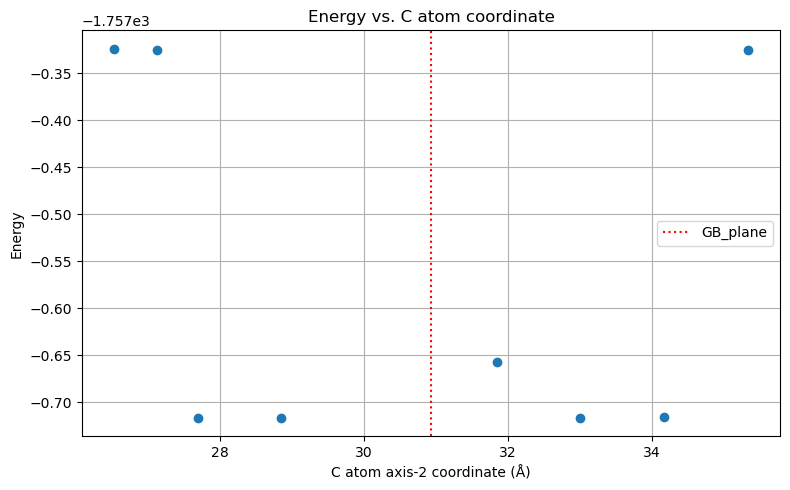

(<Figure size 800x500 with 1 Axes>,
 <Axes: title={'center': 'Energy vs. C atom coordinate'}, xlabel='C atom axis-2 coordinate (Å)', ylabel='Energy'>)

In [3]:
import matplotlib.pyplot as plt

def plot_energy_vs_element_coord(
    df,
    element,
    output_file=None,
    gb_plane=None,
    axis=2
):
    """
    Plot energy vs. atomic coordinate for a given element.

    Parameters
    ----------
    df : pandas.DataFrame
        DataFrame with columns 'atoms' (ASE Atoms) and 'results' (dict with 'energy').
    element : str
        Chemical symbol to select (e.g. 'C', 'Fe').
    output_file : str or None
        File path to save the figure. If None, the figure is not saved.
    gb_plane : float or None
        Coordinate value at which to draw a vertical reference line (Å).
    axis : int
        Index of the Cartesian axis to use for coordinates (0=x,1=y,2=z).

    Returns
    -------
    fig, ax : matplotlib.figure.Figure, matplotlib.axes.Axes
    """
    coords = []
    energies = []

    for row in df.itertuples():
        atoms = row.atoms
        energy = row.results.get('energy')
        syms = atoms.get_chemical_symbols()
        pos = atoms.get_positions()

        for i, sym in enumerate(syms):
            if sym == element:
                coords.append(pos[i][axis])
                energies.append(energy)

    fig, ax = plt.subplots(figsize=(8, 5))
    ax.scatter(coords, energies, marker='o')
    ax.set_xlabel(f'{element} atom axis-{axis} coordinate (Å)')
    ax.set_ylabel('Energy')
    ax.set_title(f'Energy vs. {element} atom coordinate')

    if gb_plane is not None:
        ax.axvline(
            x=gb_plane,
            linestyle=':',
            color='r',
            label='GB_plane'
        )
        ax.legend()

    ax.grid(True)
    plt.tight_layout()

    if output_file:
        fig.savefig(output_file, dpi=300)

    plt.show()
    return fig, ax
plot_energy_vs_element_coord(df = wf.gb_seg_calcs.outputs.df.value,
                             element  = "C",
                             output_file="energy_vs_C_coord.png",
                             gb_plane= wf.gb_plane_extractor.outputs.gb_plane_analysis_dict.value["gb_cart"] )